# ABCD - It is a technique used for detecting the probability of a lesion being a melanoma.

### A - Asymmetry
The asymmetry of the lesion. The more asymmetrical the more probable it is of being melanoma. The developed code for detecting symmetry is a product of this project. We have not tested how accurate it is nor do we recommend it's use, until it has been more properly tested. It is experimental, howerver given the constraints of this project it is considered to be functional. A simple explanation will be offered:

El código de asimetría es producto de esta investgación. No se ha probado, por lo cual no se recomienda el uso de este hasta que se haya probado de una manera más completa.

It is assumed that a nevi(e.g. mole) should be as round as possible. Ideally it is a circle. Therefore we idealize this, and compare the picture given to a circle. For this we give a score, if this score is too high we rate the object as not symmetric. For that we must first apply a threshold, do that we only have two values, 0 for healthy skin and 255 for non-healthy skin. Which corresponds to black and white respectively. 

Se asume que un nevo(lunar) debe ser lo más circular posible. Idealmente un circulo. Por lo cual idealizamos este concepto y comparamos la image con un circulo. Esto lo hacemos por medio de un puntaje. Si este puntaje es muy alto se dice que el objeto no es simétrico.Para lograr esto primeramente se le debe aplicar un umbral a la imagen de forma que la piel sana tenga un valor de 0 y la piel no sana tenga un valor de 255. Lo cual corresponde a negro y blanco respectivamente.


Examples, Ejemplos:
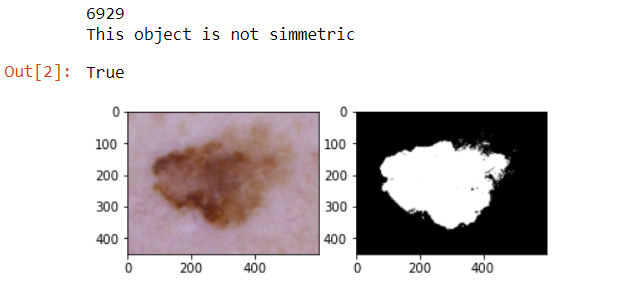

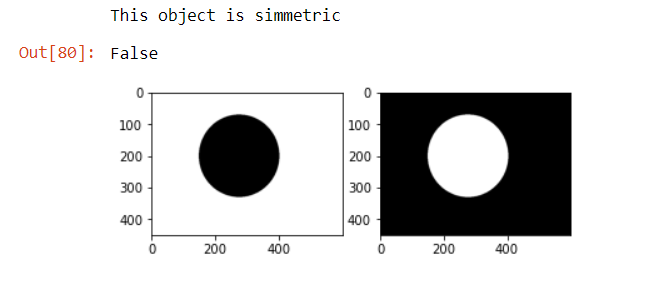

We used Otsu's threshold, for it is independant of the skin tone and adapts itself. This is done in the effor to maintain the code relevant and keep maintainance low.

Se utilizo el umbral de Otsu, ya que este es independiente del tono de piel y es capaz de adaptarse. Esto para mantener el código relevante y que necesite poco mantenimiento.

Once we have the binary image, we must centre the x axis on the middle of the object. This is done because later on we are going to compare how far each side reaches. The longer one side is compared to the other the more score will be assigned to the image. This is why we need the centre on the x axis, because this is the middle point that divides the image. Once calculated we give compare the score if it is above the designated mark(e.g. 1000 in this code) the object is considered assimetric.

Una vez que se tiene la imagen binaria, se debe centrar el eje x en el centro del objeto. Esto ya que se va a comparar cuan largo es cada mitad del objeto. Cuanto mas largo sea un lado comparado al otro va a tener un puntaje más alto. Entre más alto el puntaje se considera más asimétrico. Se designa un puntaje máximo, el cual una vez que se sobre pasa el objeto se considera asimétrico.


Improvements: The code heavily relies on the positioning of the object relative to the centre of the image. The more centered it is, the more accurate the result. It could be done not to depend on this, but currently it is not felt that it is a necessity. To do this you would need to find the centre of the object, after the threshold has been applied. Another part that could be improved is that this code only tests the x axis, it could easily be adapted to test both sides and increase the mark. We belive this could give a far more deeper study of the object.

6929
This object is not simmetric


True

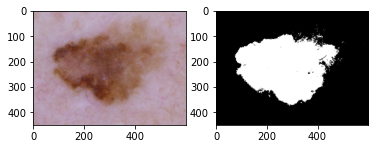

In [72]:
import cv2 #Image Library
import numpy as np #Numpy library
import matplotlib.pyplot as plt #matplotlib to show images

def assymetry(imageName):
    image = cv2.imread(imageName) #read the image
    [h,w,_] = image.shape #get width and length of the image

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Same image but in grayscale, this is done for calculating the threshold
    _,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #Get the threshold, separate the melanoma from healthy skin
    #It is done to binary, so all values are sent to either extreme, 0 or 1
    x_first= 0 #get first white 
    x_last = w-1
    y_mid = int(np.ceil(h/2)) #assumption that image is well centred at y axis
    
    
    #find the borders of the melanoma
    while(thresh[y_mid][x_first] != 255):
        x_first += 1
    while(thresh[y_mid][x_last] != 255):
        x_last -= 1
    x_mid = int(np.ceil((x_last-x_first)/2 + x_first)) #the middle of the melanoma
    #might have to redo this if I wish to truly get the middle of the object
    
    #calculate how symmetric the object is:
    tot_score = 0 #the lower the more symmetric it is
    for i in range(0,h):
        score_o = 0
        for j in range(0,x_mid):
            if( thresh[i][j] == 255):
                score_o += 1 
        for j in range(x_mid,w):
            if( thresh[i][j] == 255):
                score_o -= 1
        tot_score += abs(score_o) #update the score
    print(tot_score)
    
    
    thresh = thresh.clip(0, 255).astype('uint8') #Convert the threshold to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    f, axarr = plt.subplots(1,2) #row,column
    axarr[0].imshow(image,cmap='hsv', vmin=0, vmax=255)
    axarr[1].imshow(thresh,cmap='gray', vmin=0, vmax=255) #show threshold
    
    
    if(tot_score >= 1000):
        print("This object is not simmetric")
        return True #it is asymmetric
    print("This object is simmetric")
    return False #it is symmetric

    
imname = "Images/FirstImages/ISIC_0024792.png" #Name of the image to analyze, it uses relative pathing for image path
assymetry(imname)

275
This object is simmetric
False
754
This object is simmetric
False


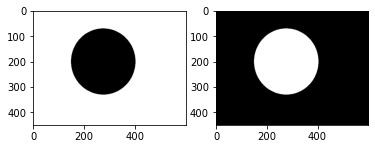

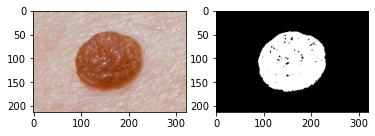

In [76]:
# imname = "Images/FirstImages/ISIC_0024792.png" #Name of the image to analyze, it uses relative pathing for image path
imname = "Images/FirstImages/assymetrytest.png"
print(assymetry(imname))

imname = "Images/FirstImages/HealthyMole.jpg"
print(assymetry(imname))


### B - Border
The border of the lesion. Melanomas may have borders that are vaguely defined. 

### C - Colour
Multiple colours are a warning sign. It is considered one of the early warning signs. While benign moles are usually a single shade of brown, a melanoma may have different shades of colour this is called variegation. This is the key to finding determining the C factor in ABCD.

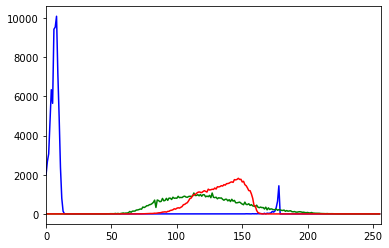

[72969.]
[145938.]
2.0


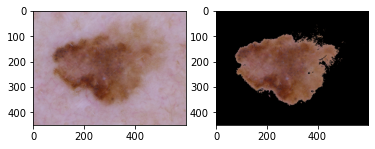

In [138]:
import cv2 #Image Library
import numpy as np #Numpy library
import matplotlib.pyplot as plt #matplotlib to show images

def colour(imageName):
    image = cv2.imread(imageName) #read the image
    [h,w,_] = image.shape #get width and length of the image
    
    roi = image[0:h, 0:w]

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #Same image but in grayscale, this is done for calculating the threshold
    _,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    mask_inv = cv2.bitwise_not(thresh) #invert it and transform it to a bitwise image, so it's easier to use
    masked = cv2.bitwise_and(roi,roi,mask = mask_inv) #do and between the two
    masked = cv2.cvtColor(masked, cv2.COLOR_BGR2HSV)
    
    #get the size of the mask
    size = 0
    for x in range(h):
        for y in range(w):
            if(mask_inv[x][y] > 0):
                size +=1
    
#     print("size: "+str(mask_size))
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([masked],[i],None,[256],[1,256])
        plt.plot(histr,col)
        plt.xlim([0,256])
    plt.show()
    
    s_v = sum(cv2.calcHist([masked],[1],None,[256],[1,256]))
    print(s_v)
    s_v += sum(cv2.calcHist([masked],[2],None,[256],[1,256]))
    print(s_v)
    s_v = float(s_v/(size))
    print(s_v)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    masked = cv2.cvtColor(masked, cv2.COLOR_HSV2RGB)
    
    f, axarr = plt.subplots(1,2) #row,column
    axarr[0].imshow(image,cmap='hsv', vmin=0, vmax=255)
    axarr[1].imshow(masked,cmap='hsv', vmin=0, vmax=255) #mask
    
imname = "Images/FirstImages/ISIC_0024792.png" #Name of the image to analyze, it uses relative pathing for image path
colour(imname)

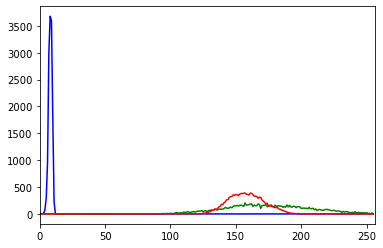

[13638.]
[27276.]
2.0
None


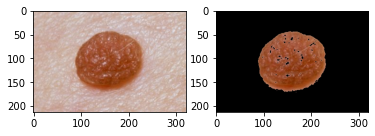

In [139]:
imname = "Images/FirstImages/HealthyMole.jpg"
print(colour(imname))


### D - Dimension